--- First 5 rows ---


<>:26: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:26: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\f_alt\AppData\Local\Temp\ipykernel_11140\2999676236.py:26: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184



--- Missing Values ---
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

--- Duplicate Rows ---
Series([], dtype: bool)

--- Shape (rows, columns) ---
(3282, 6)

--- Data types ---
Sales Person       str
Country            str
Product            str
Date               str
Amount             str
Boxes Shipped    int64
dtype: object

--- Data types after cleaning ---
Sales Person                str
Country                     str
Product                     str
Date             datetime64[us]
Amount                  float64
Boxes Shipped             int64
dtype: object

--- Statistical Summary ---


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-05-03 15:09:06.252285,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-03 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-07-04 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-05-11 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-03-02 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-08-31 00:00:00,26170.950000,778.000000


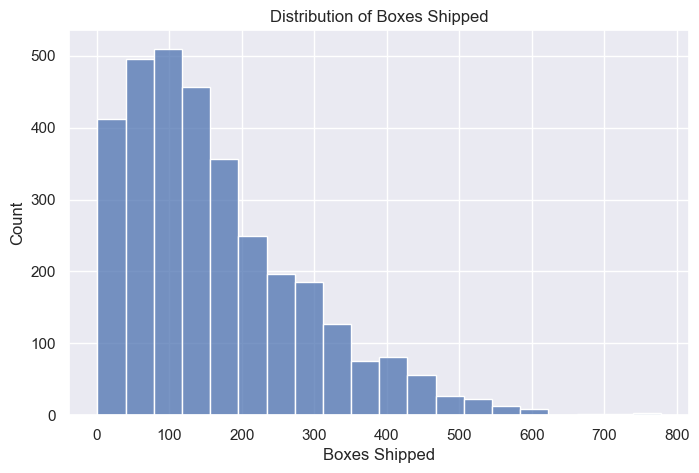

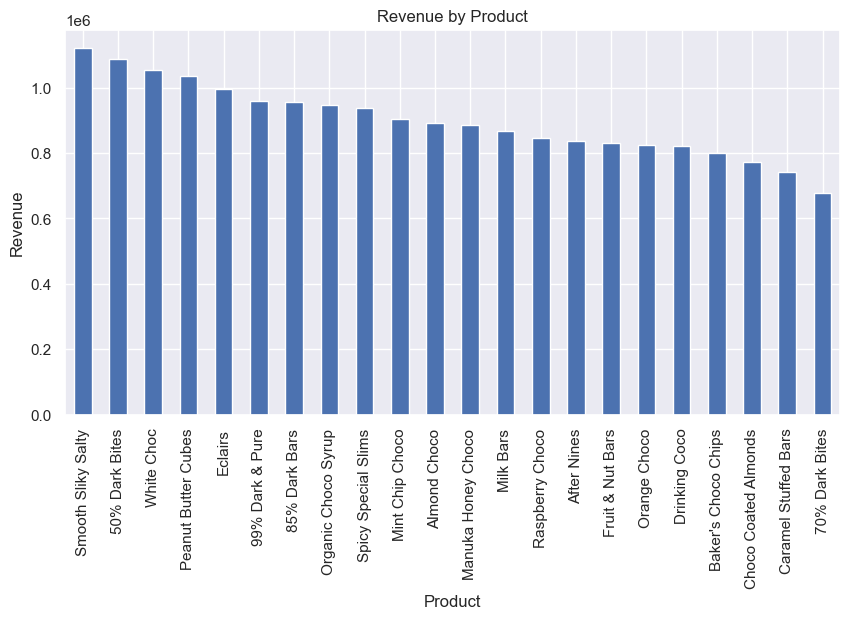

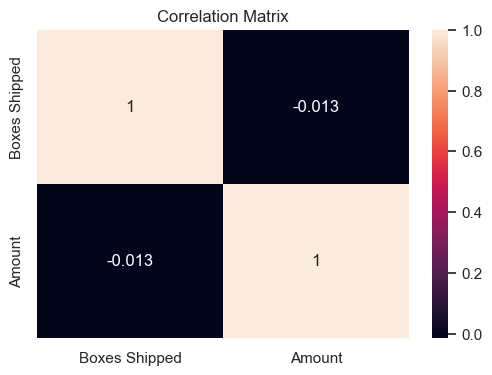

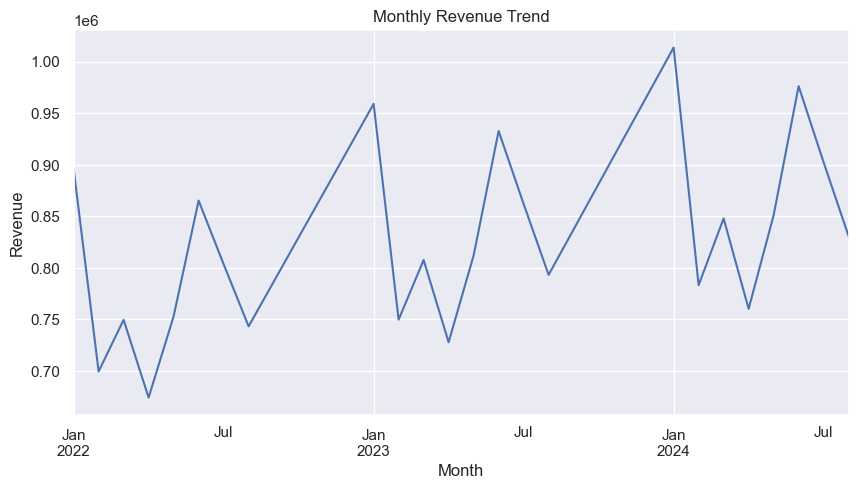

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("Chocolate_Sales.csv")

print("--- First 5 rows ---")
display(df.head())

print("\n--- Missing Values ---")
print(df.isna().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated()[df.duplicated()==True])

print("\n--- Shape (rows, columns) ---")
print(df.shape)

print("\n--- Data types ---")
print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

print("\n--- Data types after cleaning ---")
print(df.dtypes)

print("\n--- Statistical Summary ---")
display(df.describe(include='all'))

plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()